In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Punto 3


## a) Estadística univariante

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

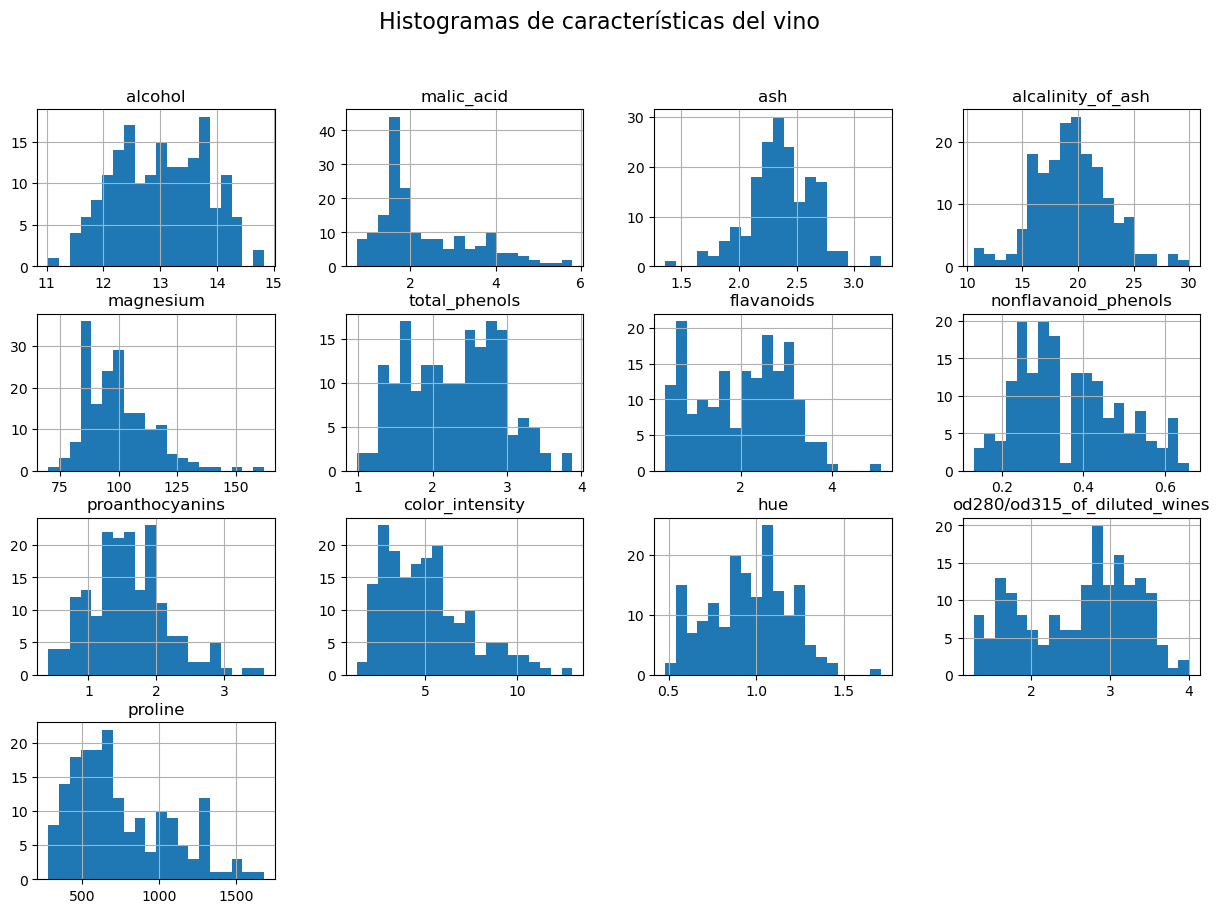

In [11]:
# Cargar dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Descripción estadística
print(X.describe())

# Histogramas
X.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histogramas de características del vino", fontsize=16)
plt.show()


## b) Estadística bivariante

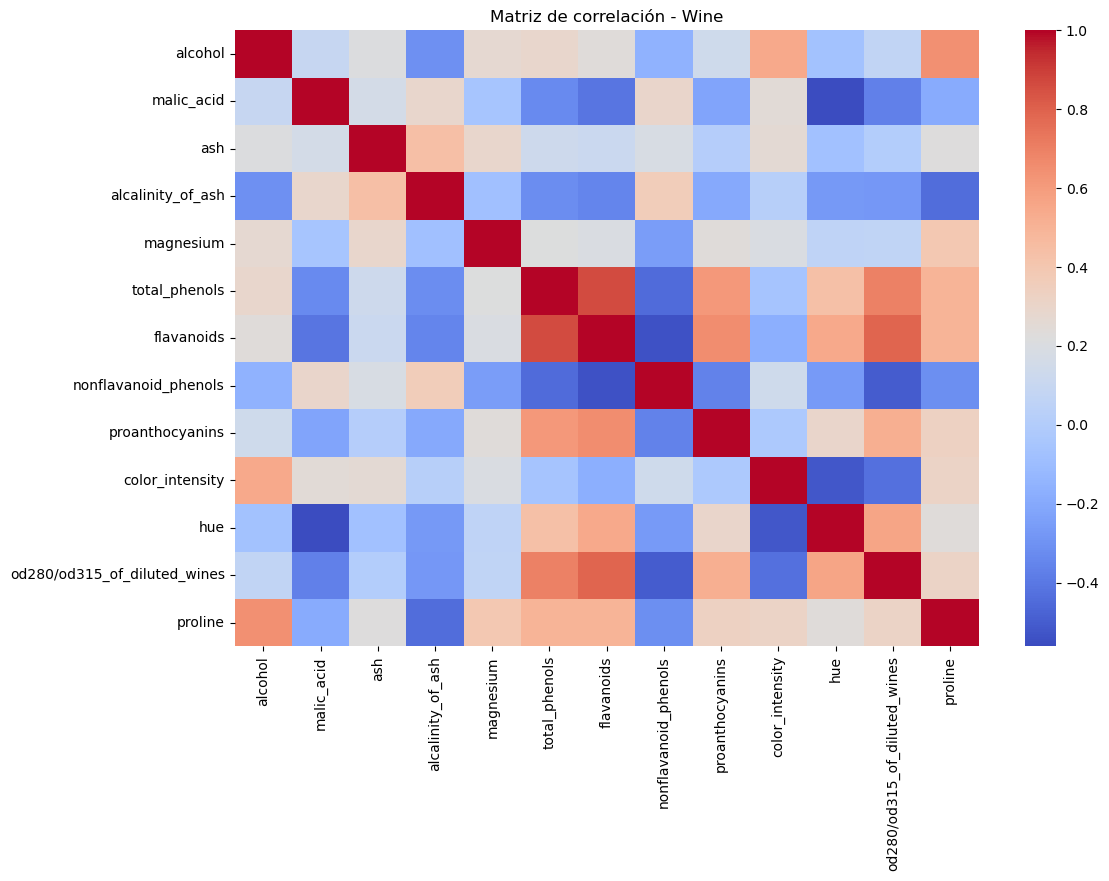

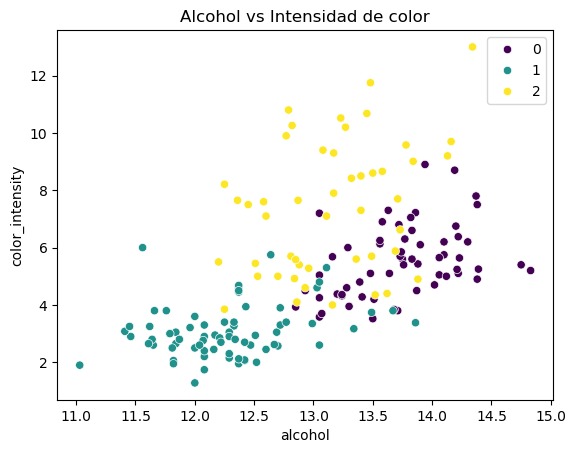

In [12]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de correlación - Wine")
plt.show()

# Scatter plot de dos variables relevantes
sns.scatterplot(x="alcohol", y="color_intensity", hue=y, palette="viridis", data=X)
plt.title("Alcohol vs Intensidad de color")
plt.show()


## c) Aplicación de PCA en 2D y 3D

Varianza explicada por cada componente: [0.36198848 0.1920749  0.11123631]
Varianza acumulada: [0.36198848 0.55406338 0.66529969]


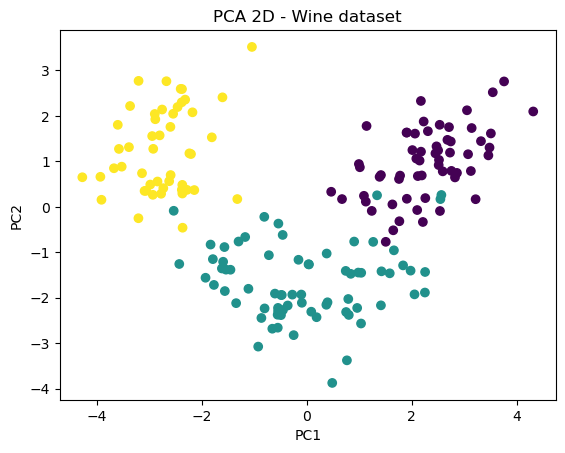

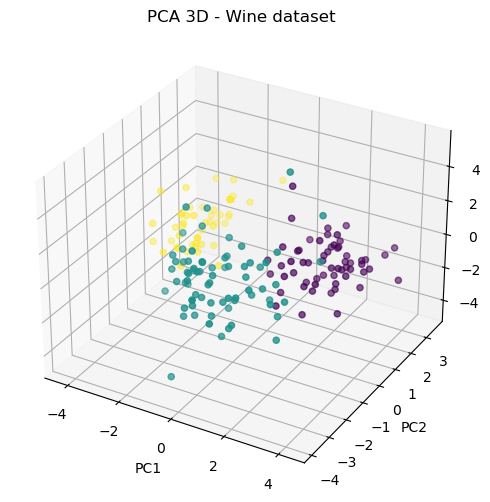

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza acumulada:", np.cumsum(pca.explained_variance_ratio_))

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D - Wine dataset")
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap="viridis")
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
ax.set_title("PCA 3D - Wine dataset")
plt.show()


## d) Número óptimo de clusters (codo y silueta)

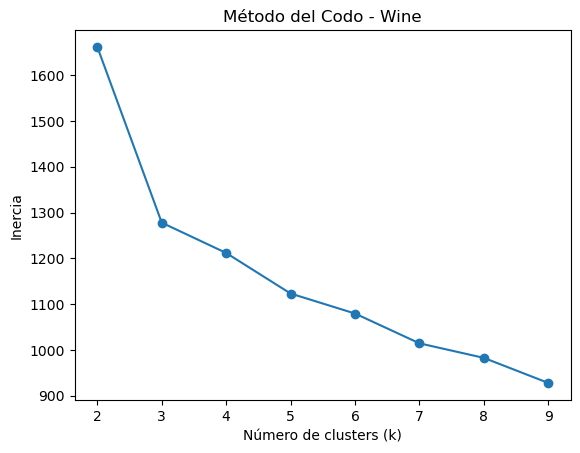

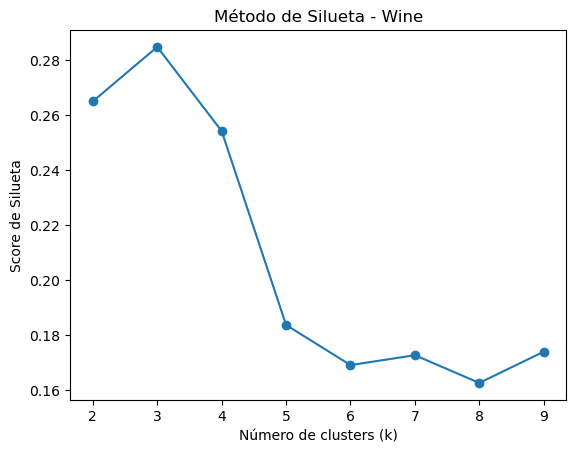

In [14]:
inertias = []
silhouettes = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# Método del codo
plt.plot(K, inertias, "-o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo - Wine")
plt.show()

# Silueta
plt.plot(K, silhouettes, "-o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Score de Silueta")
plt.title("Método de Silueta - Wine")
plt.show()


## e) Visualización de clustering


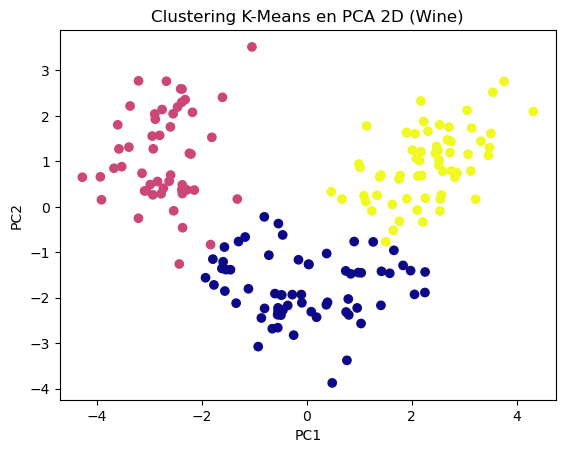

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="plasma")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering K-Means en PCA 2D (Wine)")
plt.show()


# Punto 4


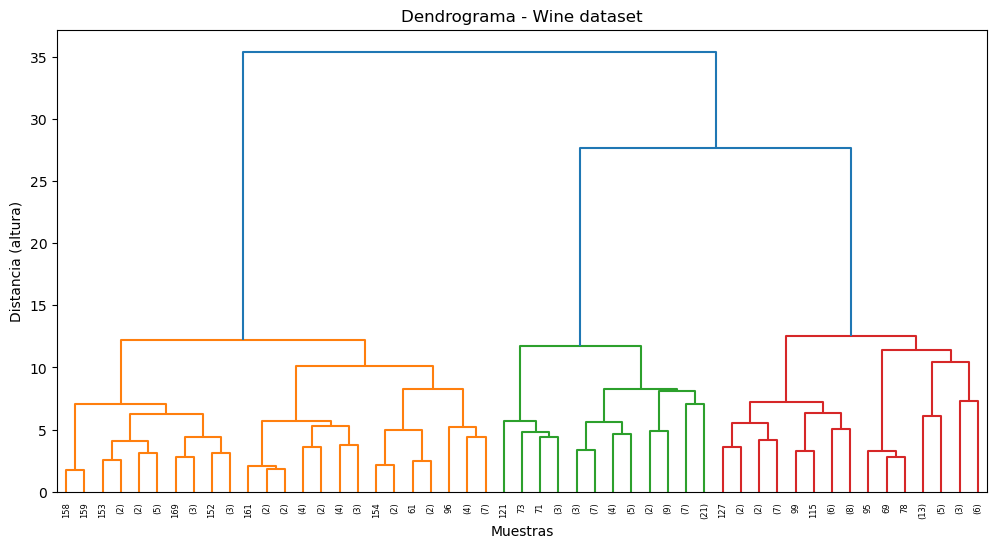

In [16]:
wine = load_wine()
X = wine.data
y = wine.target

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------
# a) Clustering jerárquico
# -------------------------
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = agg.fit_predict(X_scaled)

# -------------------------
# b) Dendrograma
# -------------------------
Z = linkage(X_scaled, method="ward")  # matriz de linkage

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Dendrograma - Wine dataset")
plt.xlabel("Muestras")
plt.ylabel("Distancia (altura)")
plt.show()

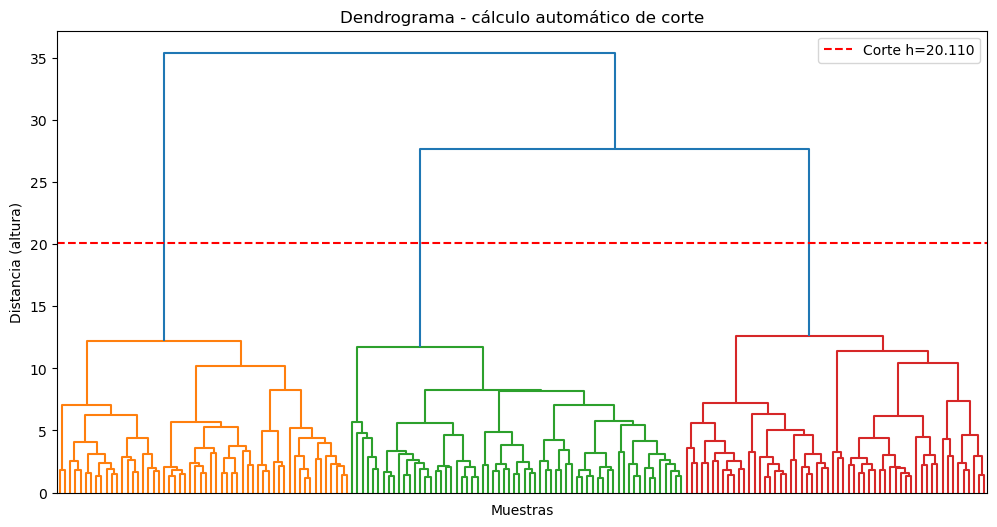

k* estimado por salto máximo: 3
Clusters encontrados con fcluster (corte a h=20.110): 3
Tamaños de clusters (id : tamaño): {1: 56, 2: 64, 3: 58}


In [20]:
# 1) Dendrograma base (sin color_threshold arbitrario)
plt.figure(figsize=(12,6))
dendrogram(Z, no_labels=True)   # no_labels=True para que quede más claro
plt.title("Dendrograma - cálculo automático de corte")
plt.xlabel("Muestras")
plt.ylabel("Distancia (altura)")

# 2) Calcular alturas y diferencias
heights = Z[:, 2]               # la tercera columna de Z son las alturas de fusión
diffs = np.diff(heights)        # diferencias entre alturas consecutivas

# Seguridad en caso extremo
if diffs.size == 0:
    cut_height = heights[0] if heights.size>0 else 0.0
    k_opt = 1
else:
    idx_max = np.argmax(diffs)                    # índice del mayor salto
    n_samples = Z.shape[0] + 1                    # Z tiene n-1 filas
    k_opt = n_samples - (idx_max + 1)             # fórmula: n - (idx+1)
    # altura de corte entre los dos saltos
    cut_height = (heights[idx_max] + heights[idx_max + 1]) / 2

# 3) Dibujar la línea de corte calculada
plt.axhline(y=cut_height, color="red", linestyle="--", label=f"Corte h={cut_height:.3f}")
plt.legend()
plt.show()

# 4) Obtener clusters con fcluster usando la altura de corte
clusters = fcluster(Z, t=cut_height, criterion='distance')
n_clusters_found = np.unique(clusters).size

print(f"k* estimado por salto máximo: {k_opt}")
print(f"Clusters encontrados con fcluster (corte a h={cut_height:.3f}): {n_clusters_found}")
# opcional: ver el tamaño de cada cluster
(unique, counts) = np.unique(clusters, return_counts=True)
print("Tamaños de clusters (id : tamaño):", dict(zip(unique, counts)))
